# Predict Tg: Cross Validation
This notebook provides a demo of using the PolymerLearn package with PolymerGNN to predict Tg values from the dataset

In [1]:
import os
import torch
import pandas as pd
from polymerlearn.utils import get_IV_add, GraphDataset

# Load data from local path:
data = pd.read_csv(os.path.join('../dataset', # May need to change path, depending on location of data 
            'pub_data.csv'))

add = get_IV_add(data) # Use same values added for IV

dataset = GraphDataset(
    data = data,
    structure_dir = '../Structures/AG/xyz',
    Y_target=['IV', 'Tg'],
    test_size = 0.2,
    add_features=add
)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Now we'll instantiate our model, using the standard IV model that gets the best prediction scores.

In [3]:
from polymerlearn.models.gnn import PolymerGNN_Joint
from polymerlearn.utils import CV_eval_joint

model_generator_kwargs = {
    'input_feat': 6,         # How many input features on each node; don't change this
    'hidden_channels': 32,   # How many intermediate dimensions to use in model
                            # Can change this ^^
    'num_additional': 4      # How many additional resin properties to include in the prediction
                            # Corresponds to the number in get_IV_add
}

optimizer_gen = torch.optim.AdamW
criterion = torch.nn.MSELoss()

all_predictions, all_y, all_inds = CV_eval_joint(
    dataset = dataset,
    model_generator = PolymerGNN_Joint,
    optimizer_generator = optimizer_gen,
    criterion = criterion,
    model_generator_kwargs = model_generator_kwargs,
    optimizer_kwargs = {'lr': 0.0001, 'weight_decay':0.01},
    epochs = 1000,
    batch_size = 64,
    verbose = 1,
    gamma = 1e5
)

Fold: 1 	 Epoch: 0, 	 Train r2: -2.5404 	 Train Loss: 1562476.4461
Fold: 1 	 Epoch: 50, 	 Train r2: 0.4683 	 Train Loss: 265662.7741
Fold: 1 	 Epoch: 100, 	 Train r2: 0.5143 	 Train Loss: 178860.3003
Fold: 1 	 Epoch: 150, 	 Train r2: 0.6940 	 Train Loss: 171657.9536
Fold: 1 	 Epoch: 200, 	 Train r2: 0.6757 	 Train Loss: 173636.8950
Fold: 1 	 Epoch: 250, 	 Train r2: 0.7406 	 Train Loss: 106583.6501
Fold: 1 	 Epoch: 300, 	 Train r2: 0.8133 	 Train Loss: 74222.1657
Fold: 1 	 Epoch: 350, 	 Train r2: 0.8572 	 Train Loss: 77351.8511
Fold: 1 	 Epoch: 400, 	 Train r2: 0.8802 	 Train Loss: 54274.7580
Fold: 1 	 Epoch: 450, 	 Train r2: 0.8816 	 Train Loss: 42758.6876
Fold: 1 	 Epoch: 500, 	 Train r2: 0.8858 	 Train Loss: 50525.7716
Fold: 1 	 Epoch: 550, 	 Train r2: 0.9186 	 Train Loss: 35623.7434
Fold: 1 	 Epoch: 600, 	 Train r2: 0.8599 	 Train Loss: 60621.7371
Fold: 1 	 Epoch: 650, 	 Train r2: 0.9011 	 Train Loss: 67096.8171
Fold: 1 	 Epoch: 700, 	 Train r2: 0.9271 	 Train Loss: 27989.5633
Fold:

Note that the cross validation, while more stable than a simple train/test split, is relatively unstable, meaning you could get a wide range of scores for any given run.

Now we can plot the model predictions vs. errors:

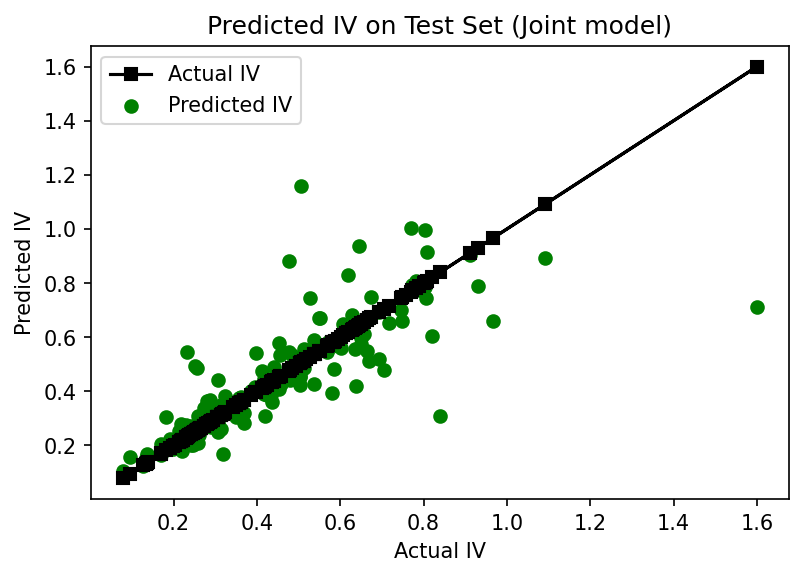

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Parse the output from the CV:
Y = np.array(all_y)
Y_iv = Y[:,0]
Y_tg = Y[:,1]

pred = np.array(all_predictions)
pred_iv = pred[:,0]
pred_tg = pred[:,1]

plt.figure(dpi=150)
plt.plot(Y_iv, Y_iv, marker = 's', c = 'black', label = 'Actual IV')
plt.scatter(Y_iv, pred_iv, c = 'green', label = 'Predicted IV')
plt.xlabel('Actual IV')
plt.ylabel('Predicted IV')
plt.title('Predicted IV on Test Set (Joint model)')
plt.legend()
plt.show()

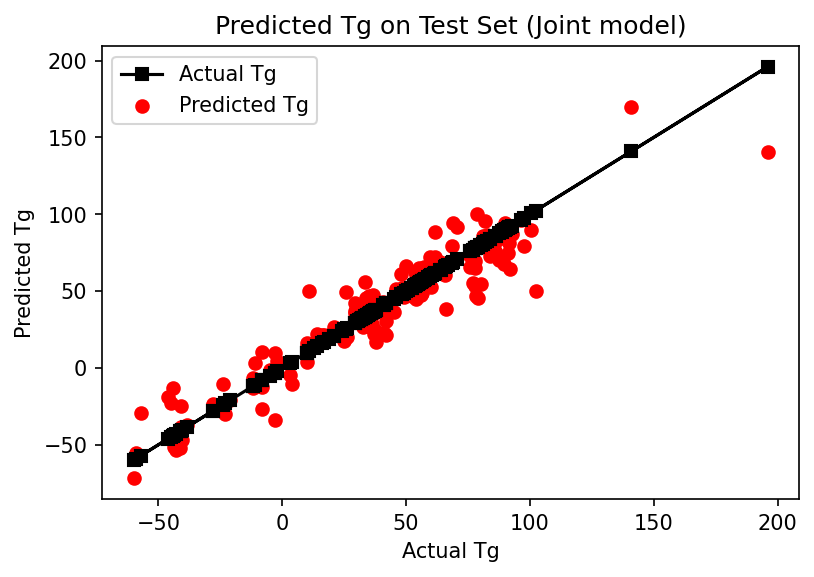

In [7]:
plt.figure(dpi=150)
plt.plot(Y_tg, Y_tg, marker = 's', c = 'black', label = 'Actual Tg')
plt.scatter(Y_tg, pred_tg, c = 'red', label = 'Predicted Tg')
plt.xlabel('Actual Tg')
plt.ylabel('Predicted Tg')
plt.title('Predicted Tg on Test Set (Joint model)')
plt.legend()
plt.show()